In [48]:
import pytesseract
import cv2
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
# img = cv2.imread(r"C:\Users\muthu\OneDrive\Pictures\Camera Roll\WIN_20240902_15_18_08_Pro.jpg")
img = cv2.imread(r'C:\Users\muthu\Documents\bill_ocr\60c4199364474569561cba359d486e6c69ae8cba.jpeg')

In [3]:
# img= img[100:900, 100:900]
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (7,7), 0)
# blur = cv2.medianBlur(gray,11)
thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,15,2)
# thresh = cv2.threshold(blur, 128,255,cv2.THRESH_BINARY)[1]

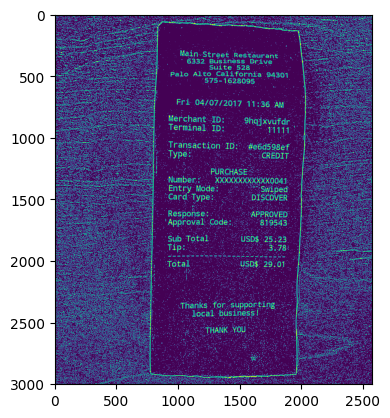

In [4]:
plt.imshow(thresh)
plt.show()

51151


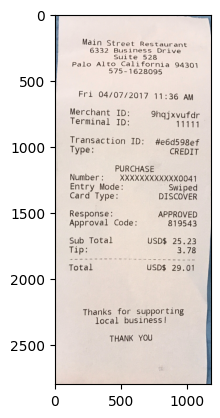

In [5]:
result = img.copy()
canny = cv2.Canny(blur, 10, 100)
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL , cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))
sort = sorted(contours, key=lambda x: cv2.contourArea(x))
# count = 0
x,y,w,h = cv2.boundingRect(sort[len(contours)-1])
cv2.rectangle(result, (x,y), (x+w, y+h), (0,255,0),2)
result = result[y+50:y+h-50, x+50:x+w-50]
# print(sort)
# for cont in sort:
#     x,y,w,h = cv2.boundingRect(cont)
#     cv2.rectangle(result, (x,y), (x+w, y+h), (0,0,255),2)
    # count = count+1
plt.imshow(result)
plt.show()

CODE for image stitching


In [18]:
cap = cv2.VideoCapture(1)
shot = []
while True:
    ret, frame = cap.read()
    cv2.imshow("frame", frame)
    if cv2.waitKey(1) & 0xFF == ord('c'):
        # shot = frame.copy()
        shot.append(frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [19]:
len(shot)

2

In [24]:
merge = cv2.vconcat(shot)
plt.imshow(merge)
plt.show()

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\core\src\matrix_operations.cpp:112: error: (-215:Assertion failed) src[i].dims <= 2 && src[i].cols == src[0].cols && src[i].type() == src[0].type() in function 'cv::vconcat'


In [49]:
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

In [7]:
print(pytesseract.image_to_string(result))

Main Street Restaurant
6332 Business Drive
Suite 528

Palo Alto California 94301
975~-1628095

Fri 04/07/2017 11:36 AM
Merchant ID: 9hqjxvufdr

Terminal ID: OGY
Transaction ID: #e6d598ef
Type: CREDIT
PURCHASE
Number : XXXXXXXXXXXXO04 1
Entry Mode: Swiped
Card Type: DISCOVER
Response: APPROVED
Approval Code: 819543
Sub Total USD$ 25.23
pe 3.78
Total USD$ 29.01

Thanks for supporting
local business!

THANK YOU



In [107]:
flag = 'kaufland'

In [ ]:
text = pytesseract.image_to_string(result)
text = text.split()
if flag == 'kaufland':

    for index, i in enumerate(text):
        # print(i)
        

        if i == 'Summe':
            print(i)
            break
    # print(text[index+1])
    
# print(index,i)
        

# print(text[index])

shot captured
shot captured
shot captured
shot captured


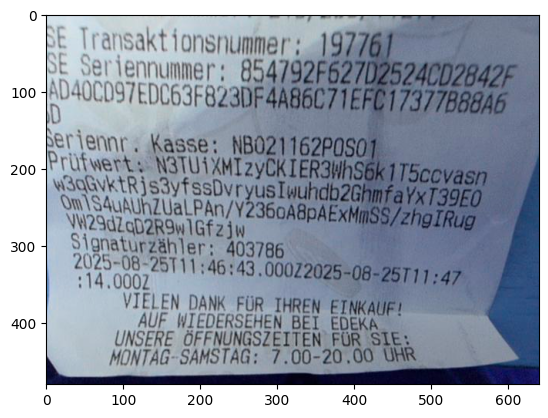

  Contributor     Shop      Date     Cost
0       Muthu                            
1       Muthu  unknown   unknown  unknown
2       Muthu  unknown  25.08.25    21,08


In [ ]:
df = pd.DataFrame(columns=['Contributor','Shop','Date', 'Cost'])
centers = ['kaufland', 'tedi', 'lidl','edeka']
cap = cv2.VideoCapture(1)
i = 0
flag = 'kaufland'
shot = []
total = []
num = "unknown"
shop = "unknown"
date = "unknown"
while True:
    i=i+1
    ret, frame = cap.read()
    
    cv2.imshow("frame", frame)
    # if i>100:
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (7,7), 0)
    ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU)
    # thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,15,2)
    result = frame.copy()
    # contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # print(len(contours))
    # sort = sorted(contours, key=lambda x: cv2.contourArea(x))
    # x,y,w,h = cv2.boundingRect(sort[len(contours)-1])
    # cv2.rectangle(result, (x,y), (x+w, y+h), (0,0,255),2)
    # result = result[y:y+h, x:x+w]
    
    # print(text)
    
    # if flag == 'kaufland':
    
        # else:
        #     date = "not found"
        
    
        

    #         # print(i)
            

    #         if i == 'Summe':
    #             print(i)
    #             break
    # print(text[index+1])
    if cv2.waitKey(1) & 0xFF == ord('c'):
        # shot = frame.copy()
        text = pytesseract.image_to_string(result)
        text = text.split()
        total = total + text 
        shot.append(result)
        print("shot captured")
    if cv2.waitKey(1) & 0xFF == ord('q'):
        plt.imshow(result)
        plt.show()
        break
cap.release()
cv2.destroyAllWindows()
# merge = cv2.vconcat(shot)

for i in range(len(total)):
    
    if total[i].lower() in centers:

        shop = total[i]

# else:
#     shop = "not found"


    if total[i] == '€':
    # print(text[i+1])
        num = total[i+1]
    # else:
    #     num = "not found"



    if total[i] == 'Datum':
        date = total[i+1]
    
contributor = 'Muthu'

Shop = shop
date = date
cost = num

df.loc[len(df)] = [contributor, Shop, date, cost]
print(df)

In [15]:
df.to_csv('sheet.csv')

Trying to build a classifier for total

In [43]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
import requests
from PIL import Image

c:\Users\muthu\Documents\bill_ocr\ocr\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [44]:
processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-printed")
model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-base-printed")

Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "qkv_bias": false,
  "transformers_version": "4.46.3"
}

Config of the decoder: <class 'transformers.models.trocr.modeling_trocr.TrOCRForCausalLM'> is overwritten by shared decoder config: TrOCRConfig {
  "activation_dropout": 0.0,
  "activation_function": "gelu",
  "add_cross_attention": true,
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "classifier_dropout": 0.0,
  "cross_attention_hidden_size": 768,
  "d_model": 1024,
  "decoder_attention_heads": 16,
  "decoder_ffn_dim": 4096,
  "decoder

In [ ]:
# load image from the IAM dataset
url = r"C:\Users\muthu\Documents\bill_ocr\2e55b3f2b91dbaf984722cba0ce9f9a3.jpg"
image = Image.open(url).convert("RGB")

pixel_values = processor(image, return_tensors="pt").pixel_values
generated_ids = model.generate(pixel_values)

generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
print(generated_text)

EFI


In [6]:
generated_text

'7 References'

Downloading and using dataset


In [13]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("trainingdatapro/ocr-receipts-text-detection")

print("Path to dataset files:", path)

100%|██████████| 52.6M/52.6M [00:05<00:00, 10.2MB/s]

Extracting model files...


Path to dataset files: C:\Users\muthu\.cache\kagglehub\datasets\trainingdatapro\ocr-receipts-text-detection\versions\1


In [22]:
import os
os.sys.path

['C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.8_3.8.2800.0_x64__qbz5n2kfra8p0\\python38.zip',
 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.8_3.8.2800.0_x64__qbz5n2kfra8p0\\DLLs',
 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.8_3.8.2800.0_x64__qbz5n2kfra8p0\\lib',
 'C:\\Users\\muthu\\AppData\\Local\\Microsoft\\WindowsApps\\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0',
 'c:\\Users\\muthu\\Documents\\bill_ocr\\ocr',
 '',
 'c:\\Users\\muthu\\Documents\\bill_ocr\\ocr\\lib\\site-packages',
 'c:\\Users\\muthu\\Documents\\bill_ocr\\ocr\\lib\\site-packages\\win32',
 'c:\\Users\\muthu\\Documents\\bill_ocr\\ocr\\lib\\site-packages\\win32\\lib',
 'c:\\Users\\muthu\\Documents\\bill_ocr\\ocr\\lib\\site-packages\\Pythonwin']

In [1]:
import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision import transforms
from PIL import Image
import cv2
from matplotlib import pyplot as plt

In [2]:
model = fasterrcnn_resnet50_fpn(pretrained=False,num_classes=5)
model.load_state_dict(torch.load(r"C:\Users\muthu\Documents\bill_ocr\model\model.pth"))
model.eval()

c:\Users\muthu\Documents\bill_ocr\ocr\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\muthu\Documents\bill_ocr\ocr\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
C:\Users\muthu\AppData\Local\Temp\ipykernel_15208\2905234178.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `we

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=1e-05)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=1e-05)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=1e-05)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=1e-05)
          (relu

In [33]:
image_path = r"C:\Users\muthu\Documents\bill_ocr\2e55b3f2b91dbaf984722cba0ce9f9a3.jpg"
image = Image.open(image_path)
transform = transforms.Compose([transforms.Resize((512,512)), transforms.ToTensor()])
image = transform(image)
predictions = model(image.unsqueeze(0))

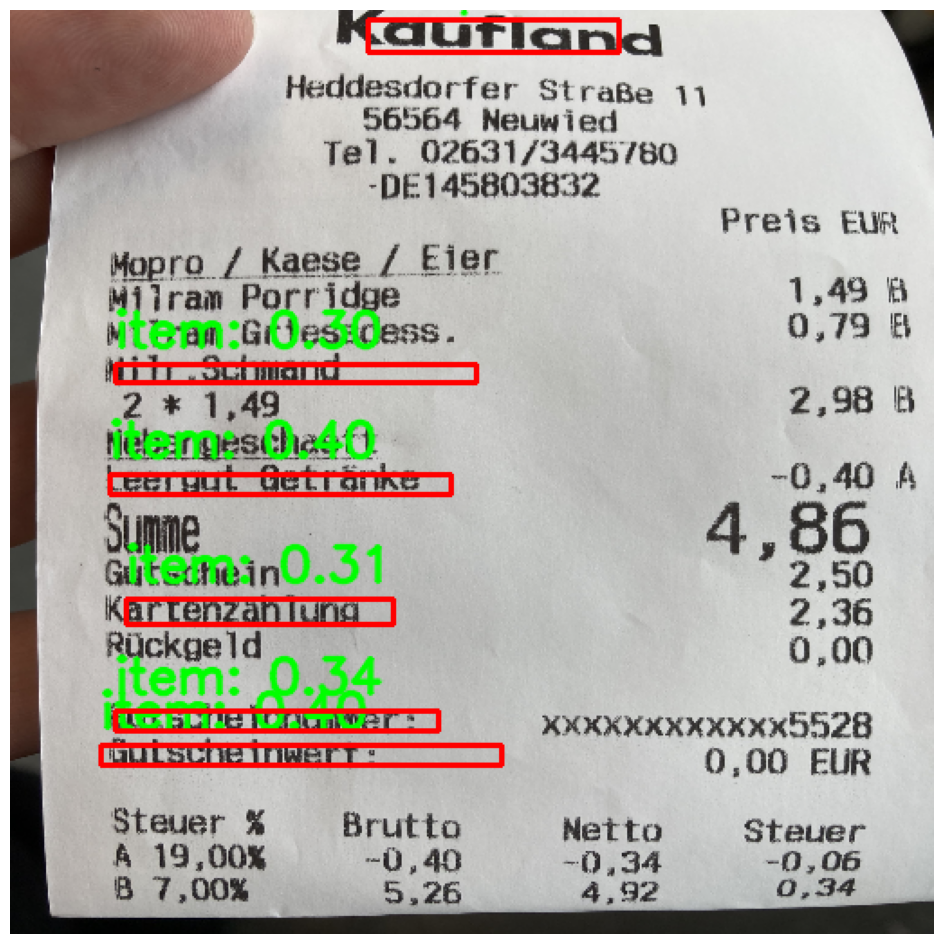

In [38]:
boxes = predictions[0]['boxes']
labels = predictions[0]['labels']
scores = predictions[0]['scores']
label_list = ["","shop","item","date_time","total"]
# Threshold
image = cv2.imread(image_path)
image = cv2.resize(image, (512,512))
threshold = 0.3
images = []
image_copy = image.copy()
for i in range(len(boxes)):
    if scores[i] > threshold:
        box = boxes[i].detach().numpy().astype(int)
        label = label_list[labels[i]]
        score = scores[i].item()
        
        img = image_copy[box[1]-5:box[3]+5,box[0]-5:box[2]+5]
        images.append(img)
        # draw label and score
        text = f"{label}: {score:.2f}"
        cv2.putText(image, text, (box[0], box[1] - 10), cv2.FONT_HERSHEY_SIMPLEX,
                    0.9, (0, 255, 0), 2, cv2.LINE_AA)

        # Draw rectangle and label
        cv2.rectangle(image, (box[0], box[1]), (box[2], box[3]), (0, 0, 255), 2)


# Convert BGR to RGB for correct display with matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Show image with larger figure size
plt.figure(figsize=(16, 12))  # Increase size as needed
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

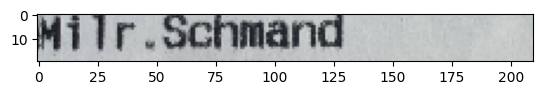

In [64]:
plt.imshow(images[5])
plt.show()

In [61]:
# load image from the IAM dataset
# url = r"C:\Users\muthu\Documents\bill_ocr\2e55b3f2b91dbaf984722cba0ce9f9a3.jpg"
# image = Image.open(url).convert("RGB")

pixel_values = processor(images[5], return_tensors="pt").pixel_values
generated_ids = model.generate(pixel_values)

generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
print(generated_text)

c:\Users\muthu\Documents\bill_ocr\ocr\lib\site-packages\transformers\generation\utils.py:1375: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


MILR.SCHMAND


In [60]:
print(pytesseract.image_to_string(images[5]))

Mitr. .ochmand



In [65]:
from PIL import Image

In [66]:
img = Image.open("C:\\Users\\muthu\\Documents\\bill_ocr\\Dataset\\Images\\026.jpg")

UnidentifiedImageError: cannot identify image file 'C:\\Users\\muthu\\Documents\\bill_ocr\\Dataset\\Images\\026.jpg'